In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#Generate some pseudo data
np.random.seed(123)
n = 100
x = np.random.randn(n)
y = 2 * x + np.random.randn(n)

In [5]:
#Define the model
with pm.Model() as Linear_reg:
    #define the prior for the slope and intercept
    α = pm.Normal('α', mu =0, sd =10)
    β = pm.Normal('β', mu=0, sd = 10)
    # define the liekelihood
    y_obs = pm.Normal('y_obs', mu= α + β * x, sd =1, observed =y)
    #perform Markov Chain Monte Carlo sampling
    trace = pm.sample(2000, chains =2)

<ipython-input-5-b03f5fd0d16f>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, chains =2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 18 seconds.


basically the code above simply defines a simple linear regression model with a normally distributed prior for the slope and intercept

the likelihood is also defined normal dist, with mean equal to the linear combination of the predictors and observed data. fitting the model using MCMC sampling which generates posterior samples from the model

below we visualise the posterior dist of  the model params using the built in plot functions

<ipython-input-6-dbeb5e446e2c>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


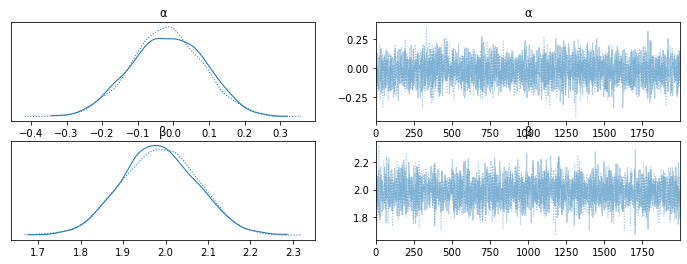

In [6]:
pm.traceplot(trace)
plt.show()

the above shows the traceplot of the posterior distribution of the model params,  which helps us understand how the model fit the data and check for possible convergence issues.

now next we plot the posterior distribution of the model params and visualize the uncertainty in the estimates:

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


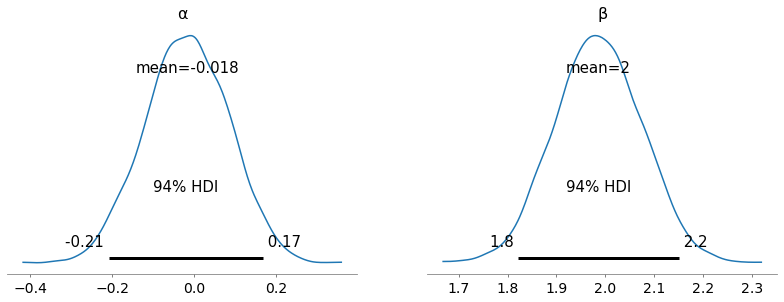

In [7]:
pm.plot_posterior(trace)
plt.show()

the above plot provides the posterior distribution of each params in the model. the x-axis represents the param value, the y-axis represents the probability density.. 
the shade region corresponds to the `uncertainty` in the estimate, with darker areas indicating higher density.

below is the estimated posterior distribtuion using kernel density estimation (KDE) method, which is non-parametric way to estimate the probability function of a random variable

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


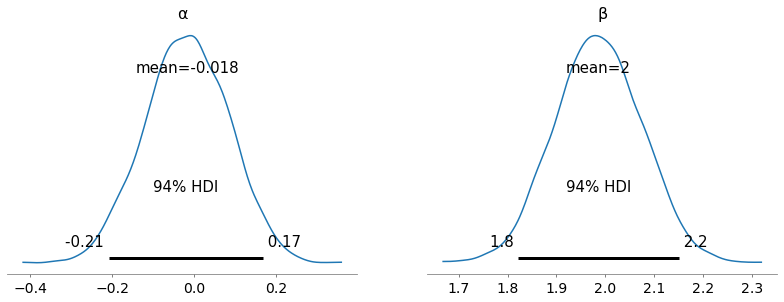

In [8]:
pm.plot_posterior(trace, kind='kde')
plt.show()

In [ ]:
#if you wantto specify which params would you like to plot
pm.plot_posterior(trace, var_names=['α','β'])
plt.show()

In [2]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat Jan 21 2023

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.8.0

pymc3     : 3.11.5
matplotlib: 3.6.3
numpy     : 1.22.1

Watermark: 2.3.1

